In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pandas.read_csv('profiles.tsv', sep="\t", header=None, )

In [3]:
data.columns = ["species", "replicate", "genomes", "cores", "rayt", "reference", "start", "end"]

In [4]:
data['start'] = pandas.to_datetime(data['start'])

In [5]:
data['end'] = pandas.to_datetime(data['end'])

In [6]:
data["wall time"] = data['end'] - data['start']

In [7]:
data["wall time"] = data["wall time"].dt.total_seconds()

In [8]:
data['rayt'] = data.rayt.str.split("/", expand=True).iloc[:,-1]
data['rayt'] = data.rayt.str.split(".", expand=True).iloc[:,0]

In [9]:
data['reference'] = data.reference.str.split(".", expand=True).iloc[:, 0]

In [10]:
data.head()

,species,replicate,genomes,cores,rayt,reference,start,end,wall time
0,chlor,1,5,4,yafM_Ecoli,chlZJU60,2022-09-21 10:12:33.983070+02:00,2022-09-21 10:17:08.276350+02:00,274.293280
1,chlor,1,5,4,yafM_SBW25,chlB25,2022-09-21 10:17:08.398678+02:00,2022-09-21 10:21:18.783942+02:00,250.385264
2,chlor,1,5,8,yafM_Ecoli,chl189,2022-09-21 10:21:18.879789+02:00,2022-09-21 10:26:14.448536+02:00,295.568747
3,chlor,1,5,8,yafM_SBW25,chlPA23,2022-09-21 10:26:14.559126+02:00,2022-09-21 10:32:20.765003+02:00,366.205877
4,chlor,1,5,12,yafM_Ecoli,chlDTR133,2022-09-21 10:32:20.884702+02:00,2022-09-21 10:38:39.862888+02:00,378.978186


## Make categorical data

In [11]:
data['species'] = data.species.astype('category')

In [12]:
for col in ['species', 'replicate', 'genomes', 'cores', 'rayt', 'reference']:
    data[col] = data[col].astype("category")

## Plots

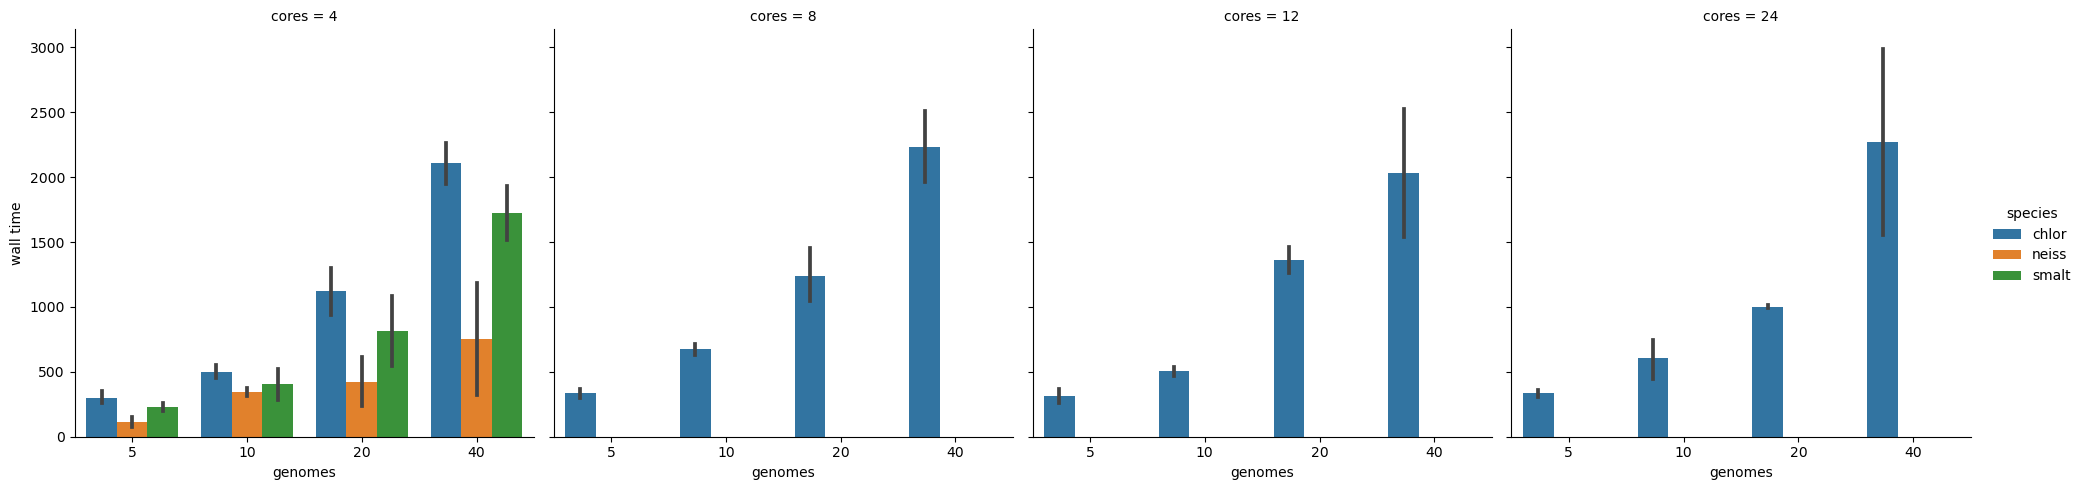

In [13]:
sns.catplot(data=data[data['wall time'] > 1.0], x='genomes', y='wall time', hue='species', col='cores',  kind='bar')

In [14]:
data.query('`cores`==4')

,species,replicate,genomes,cores,rayt,reference,start,end,wall time
0,chlor,1,5,4,yafM_Ecoli,chlZJU60,2022-09-21 10:12:33.983070+02:00,2022-09-21 10:17:08.276350+02:00,274.293280
1,chlor,1,5,4,yafM_SBW25,chlB25,2022-09-21 10:17:08.398678+02:00,2022-09-21 10:21:18.783942+02:00,250.385264
8,chlor,1,10,4,yafM_Ecoli,chlChPhzS135,2022-09-21 10:54:18.722643+02:00,2022-09-21 11:03:08.669841+02:00,529.947198
9,chlor,1,10,4,yafM_SBW25,chlQ16,2022-09-21 11:03:08.825017+02:00,2022-09-21 11:12:39.146724+02:00,570.321707
16,chlor,1,20,4,yafM_Ecoli,chl17411,2022-09-21 12:07:35.223486+02:00,2022-09-21 12:25:09.838300+02:00,1054.614814
17,chlor,1,20,4,yafM_SBW25,chl21509,2022-09-21 12:25:10.113076+02:00,2022-09-21 12:38:52.305543+02:00,822.192467
24,chlor,1,40,4,yafM_Ecoli,chl464,2022-09-21 14:39:18.478480+02:00,2022-09-21 15:11:45.060683+02:00,1946.582203
25,chlor,1,40,4,yafM_SBW25,chl189,2022-09-21 15:11:45.948478+02:00,2022-09-21 15:49:30.872720+02:00,2264.924242
32,chlor,2,5,4,yafM_Ecoli,chlP2,2022-09-21 19:27:26.451257+02:00,2022-09-21 19:33:40.229689+02:00,373.778432
33,chlor,2,5,4,yafM_SBW25,chlQ16,2022-09-21 19:33:40.358109+02:00,2022-09-21 19:38:33.894956+02:00,293.536847


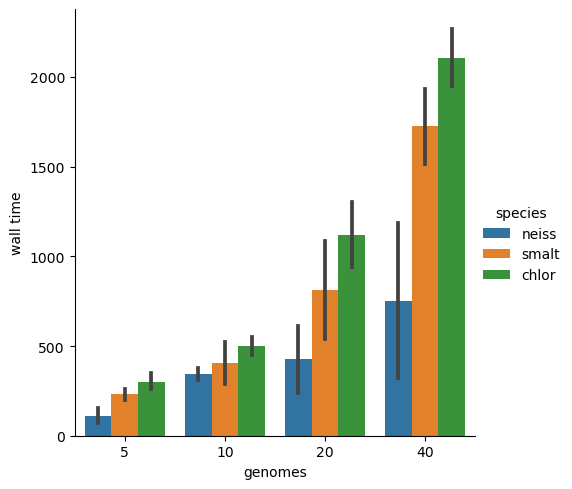

In [17]:
sns.catplot(data=data.query('`cores`==4').query('`wall time` > 1.0'), x='genomes', y='wall time', hue='species',  kind='bar', hue_order=['neiss', 'smalt', 'chlor'])

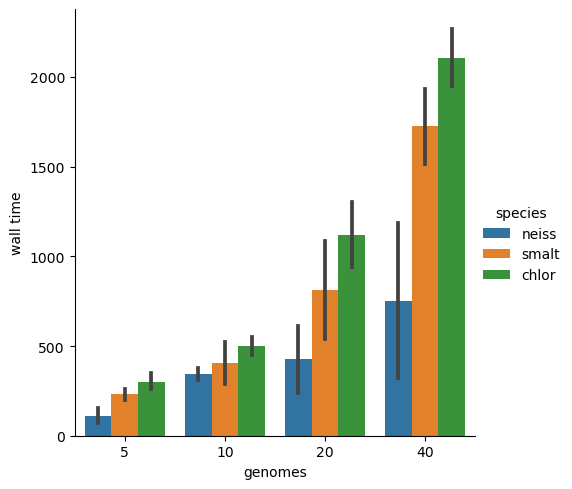

In [56]:
sns.catplot(data=data.query('`cores`==4').query('`wall time` > 1.0'), x='genomes', y='wall time', hue='species',  kind='bar', hue_order=['neiss', 'smalt', 'chlor'])
plt.savefig("wall_time__vs__genomes.png")

## Average genome sizes:

In [21]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [30]:
def get_genome_length(fname):
    with open(fname, 'r') as ifh:
        record = next(SeqIO.parse(ifh, 'fasta'))
        
        return len(record.seq)

In [25]:
neiss_genomes = 

In [31]:
get_genome_length(neiss_genomes[0])

2153922

In [32]:
genomes = ['neiss', 'smalt', 'chlor']

In [33]:
import numpy

In [35]:
genome_lengths = dict([(genome, numpy.mean([get_genome_length(f) for f in [line.strip("\n") for line in open('{}/genomes.txt'.format(genome), 'r').readlines()]])) for genome in genomes])

In [37]:
genome_lengths

{'neiss': 2202459.5923076924,
 'smalt': 4705799.775510204,
 'chlor': 6921336.954545454}

In [40]:
# Divide wall time by genome length and number of genomes
data['genome length'] = pandas.Series(data=[genome_lengths[species] for species in data['species'].values])

In [41]:
data.head()

,species,replicate,genomes,cores,rayt,reference,start,end,wall time,genome length
0,chlor,1,5,4,yafM_Ecoli,chlZJU60,2022-09-21 10:12:33.983070+02:00,2022-09-21 10:17:08.276350+02:00,274.293280,6.921337e+06
1,chlor,1,5,4,yafM_SBW25,chlB25,2022-09-21 10:17:08.398678+02:00,2022-09-21 10:21:18.783942+02:00,250.385264,6.921337e+06
2,chlor,1,5,8,yafM_Ecoli,chl189,2022-09-21 10:21:18.879789+02:00,2022-09-21 10:26:14.448536+02:00,295.568747,6.921337e+06
3,chlor,1,5,8,yafM_SBW25,chlPA23,2022-09-21 10:26:14.559126+02:00,2022-09-21 10:32:20.765003+02:00,366.205877,6.921337e+06
4,chlor,1,5,12,yafM_Ecoli,chlDTR133,2022-09-21 10:32:20.884702+02:00,2022-09-21 10:38:39.862888+02:00,378.978186,6.921337e+06


In [45]:
data['wall time per genome and Mb'] = data['wall time'].div(data['genomes'].astype(int)).div(data['genome length'])*1e6

In [46]:
data.head()

,species,replicate,genomes,cores,rayt,reference,start,end,wall time,genome length,wall time per genome and Mb
0,chlor,1,5,4,yafM_Ecoli,chlZJU60,2022-09-21 10:12:33.983070+02:00,2022-09-21 10:17:08.276350+02:00,274.293280,6.921337e+06,7.926020
1,chlor,1,5,4,yafM_SBW25,chlB25,2022-09-21 10:17:08.398678+02:00,2022-09-21 10:21:18.783942+02:00,250.385264,6.921337e+06,7.235170
2,chlor,1,5,8,yafM_Ecoli,chl189,2022-09-21 10:21:18.879789+02:00,2022-09-21 10:26:14.448536+02:00,295.568747,6.921337e+06,8.540799
3,chlor,1,5,8,yafM_SBW25,chlPA23,2022-09-21 10:26:14.559126+02:00,2022-09-21 10:32:20.765003+02:00,366.205877,6.921337e+06,10.581940
4,chlor,1,5,12,yafM_Ecoli,chlDTR133,2022-09-21 10:32:20.884702+02:00,2022-09-21 10:38:39.862888+02:00,378.978186,6.921337e+06,10.951011


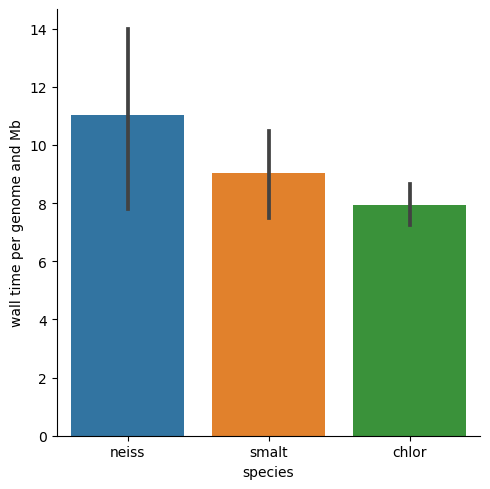

In [58]:
sns.catplot(data=data.query('`cores`==4'), x='species', y='wall time per genome and Mb', kind='bar', order=['neiss', 'smalt', 'chlor'])
plt.savefig("normalized_wall_time__vs__species.pdf")
plt.savefig("normalized_wall_time__vs__species.png")